## Sprint アンサンブル学習

In [249]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### 2.アンサンブル学習


3種類のアンサンブル学習をスクラッチ実装していきます。そして、それぞれの効果を小さめのデータセットで確認します。

ブレンディング
バギング
スタッキング

#### 小さなデータセットの用意
以前も利用した回帰のデータセットを用意します。

[House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

この中のtrain.csvをダウンロードし、目的変数としてSalePrice、説明変数として、GrLivAreaとYearBuiltを使います。

train.csvを学習用（train）8割、検証用（val）2割に分割してください。

scikit-learn
単一のモデルはスクラッチ実装ではなく、scikit-learnなどのライブラリの使用を推奨します。

[sklearn.linear_model.LinearRegression — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

[sklearn.svm.SVR — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html)

[sklearn.tree.DecisionTreeRegressor — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

### 3.ブレンディング


#### 【問題1】ブレンディングのスクラッチ実装
ブレンディング をスクラッチ実装し、単一モデルより精度があがる例を 最低3つ 示してください。精度があがるとは、検証用データに対する平均二乗誤差（MSE）が小さくなることを指します。

#### ブレンディングとは
ブレンディングとは、N個の多様なモデルを独立して学習させ、推定結果を重み付けした上で足し合わせる方法です。最も単純には平均をとります。多様なモデルとは、以下のような条件を変化させることで作り出すものです。

手法（例：線形回帰、SVM、決定木、ニューラルネットワークなど）
ハイパーパラメータ（例：SVMのカーネルの種類、重みの初期値など）
入力データの前処理の仕方（例：標準化、対数変換、PCAなど）

重要なのはそれぞれのモデルが大きく異なることです。

回帰問題でのブレンディングは非常に単純であるため、scikit-learnには用意されていません。

《補足》

分類問題の場合は、多数決を行います。回帰問題に比べると複雑なため、scikit-learnにはVotingClassifierが用意されています。

[sklearn.ensemble.VotingClassifier — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html)


In [250]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
#平均二乗誤差（MSE
from sklearn.metrics import mean_squared_error
# 多数決（アンサンブル）
from sklearn.ensemble import VotingClassifier

In [251]:
#データの読み込み
df =pd.read_csv("train.csv")
X = df[['GrLivArea','YearBuilt']].values
y = df['SalePrice'].values

<AxesSubplot:ylabel='Count'>

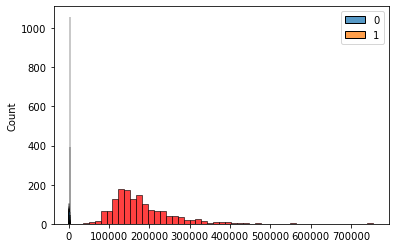

In [252]:
sns.histplot(X)
sns.histplot(y,color='red')

In [253]:
#対数変換
log_X = np.log(X)
log_y = np.log(y)

<AxesSubplot:ylabel='Count'>

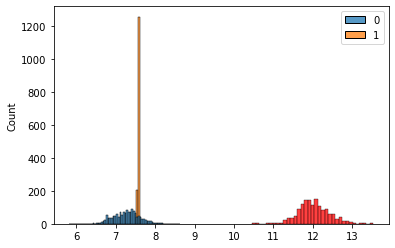

In [254]:
sns.histplot(log_X)
sns.histplot(log_y,color='red')

In [255]:
#標準化
sc = StandardScaler()
sc_X = sc.fit_transform(X)
sc_y = sc.fit_transform(y[:,np.newaxis])

<AxesSubplot:ylabel='Count'>

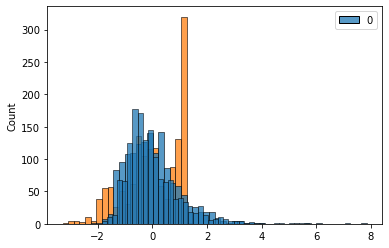

In [256]:
sns.histplot(sc_X)
sns.histplot(sc_y,color='green')

In [257]:
#対数変換後標準化
X = sc.fit_transform(log_X)
y = sc.fit_transform(log_y[:,np.newaxis])

<AxesSubplot:ylabel='Count'>

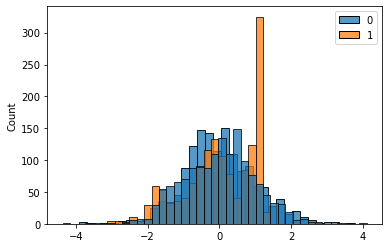

In [258]:
sns.histplot(sc_log_y,color="red")
sns.histplot(sc_log_X)

In [259]:
#8:2に分割(log_sc)
X_train,X_test,y_train,y_test = train_test_split(X,y.flatten(),test_size=0.2)

In [260]:
#SVM
svm = SVR()
svm.fit(X_train,y_train)
y_svm = svm.predict(X_test)
mean_squared_error(y_svm,y_test)

0.2727662412587793

In [261]:
#決定木
tree = DecisionTreeRegressor()
tree.fit(X_train_sc,y_train)
y_tree = tree.predict(X_test)
mean_squared_error(y_tree,y_test)

1.7677360715851123

In [262]:
# 上記2つのモデルを平均で出した
y_vote1 = (y_svm*0.7)+(y_tree*0.3)

mean_squared_error(y_vote1,y_test)

0.41050243453306245

いい結果とはならなかった。

In [263]:
#線形回帰
lr = LinearRegression()
lr.fit(X_train,y_train)
y_lr = lr.predict(X_test)
mean_squared_error(y_lr,y_test)

0.28787425403255745

In [264]:
# 決定木と線形回帰のブレンディング
y_vote2 = (y_lr*0.2)+(y_tree*0.8)

mean_squared_error(y_vote2,y_test)

1.2236463976241467

悪い結果を混ぜてしまうと必然的に悪くなる


In [265]:
# 上記3つのモデルを平均で出した　アンサンブル
y_vote3 = (y_lr*0.2)+(y_tree*0.01)+(y_svm*0.79)

mean_squared_error(y_vote3,y_test)

0.2718024304754451

期待した結果にはならなかった

In [232]:

pd.DataFrame((mean_squared_error(y_svm,y_test),mean_squared_error(y_vote1,y_test),mean_squared_error(y_vote2,y_test),mean_squared_error(y_vote3,y_test)),columns=['mse'],index=['svm','1','2','3'])

,mse
svm,0.272908
1,0.453084
2,1.485373
3,0.277355


効果が薄い

In [132]:
# #ブレンディング (分類問題の時に使用する)
# vote_clf = VotingClassifier(estimators=[('lr',lr),('svm',svm),('tree',tree)])
# vote_clf.fit(X_train, y_train)
# y_vote = vote_clf.predict(X_test)
# mean_squared_error(y_vote,y_test)

## 4.バギング


#### 【問題2】バギングのスクラッチ実装
バギング をスクラッチ実装し、単一モデルより精度があがる例を 最低1つ 示してください。

#### バギングとは
バギングは入力データの選び方を多様化する方法です。学習データから重複を許した上でランダムに抜き出すことで、  
N種類のサブセット（ ブートストラップサンプル ）を作り出します。  
それらによってモデルをN個学習し、推定結果の平均をとります。ブレンディングと異なり、それぞれの重み付けを変えることはありません。

[sklearn.model_selection.train_test_split — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

scikit-learnのtrain_test_splitを、shuffleパラメータをTrueにして使うことで、ランダムにデータを分割することができます。  
これによりブートストラップサンプルが手に入ります。

推定結果の平均をとる部分はブースティングと同様の実装になります。

In [285]:
#学習用と検証用で分ける
X,X_tes0,y,y_tes0 = train_test_split(X,y,test_size=0.2,random_state=72)

In [286]:
#8:2に分割
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=True)



In [287]:
tree1 = DecisionTreeRegressor()
tree1.fit(X_train,y_train)
y_tree1 = tree.predict(X_test)
y_tree11 = tree.predict(X_tes0)
mean_squared_error(y_tree1,y_test)

0.10615674158505549

In [288]:
#8:2に分割
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=True)

In [289]:
tree2 = DecisionTreeRegressor()
tree2.fit(X_train,y_train)
y_tree2 = tree.predict(X_test)
y_tree22 = tree.predict(X_tes0)
mean_squared_error(y_tree2,y_test)

0.1029038354253033

In [290]:
#8:2に分割
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=True)

In [291]:
tree3 = DecisionTreeRegressor()
tree3.fit(X_train,y_train)
y_tree3 = tree.predict(X_test)
y_tree33 = tree.predict(X_tes0)
mean_squared_error(y_tree3,y_test)

0.1321343562261188

In [292]:
# 上記3つのモデルを平均で出した　アンサンブル
y_trees = (y_tree11+y_tree22+y_tree33)/3
mean_squared_error(y_trees,y_tes0)

0.18350175554849193

In [293]:
#そのままの決定木
tree0 = DecisionTreeRegressor()
tree0.fit(X_train,y_train)
y_tree0 = tree0.predict(X_tes0)
mean_squared_error(y_tree0,y_tes0)

0.500745385624587

In [294]:
pd.DataFrame((mean_squared_error(y_tree0,y_tes0),mean_squared_error(y_trees,y_tes0)),columns=['mse'],index=['決定木','ブレンディング決定木'])

,mse
決定木,0.500745
ブレンディング決定木,0.183502


すごい効果があった。

## 5.スタッキング


#### 【問題3】スタッキングのスクラッチ実装
スタッキング をスクラッチ実装し、単一モデルより精度があがる例を 最低1つ 示してください。

スタッキングとは
スタッキングの手順は以下の通りです。最低限ステージ0とステージ1があればスタッキングは成立するため、それを実装してください。まずは 
K 0=3,M0=2 程度にします。

《学習時》

（ステージ 
0
 ）

学習データを 
K
0
 個に分割する。
分割した内の 
(
K
0
−
1
)
 個をまとめて学習用データ、残り 
1
 個を推定用データとする組み合わせが 
K
0
 個作れる。
あるモデルのインスタンスを 
K
0
 個用意し、異なる学習用データを使い学習する。
それぞれの学習済みモデルに対して、使っていない残り 
1
 個の推定用データを入力し、推定値を得る。（これをブレンドデータと呼ぶ）
さらに、異なるモデルのインスタンスも 
K
0
 個用意し、同様のことを行う。モデルが 
M
0
 個あれば、 
M
0
 個のブレンドデータが得られる。

（ステージ 
n
 ）

ステージ 
n
−
1
 のブレンドデータを
M
n
−
1
 次元の特徴量を持つ学習用データと考え、 
K
n
 個に分割する。以下同様である。

（ステージ 
N
 ）＊最後のステージ

ステージ 
N
−
1
 の 
M
N
−
1
 個のブレンドデータを
M
N
−
1
 次元の特徴量の入力として、1種類のモデルの学習を行う。これが最終的な推定を行うモデルとなる。

《推定時》

（ステージ 
0
 ）

テストデータを 
K
0
×
M
0
 個の学習済みモデルに入力し、
K
0
×
M
0
 個の推定値を得る。これを 
K
0
 の軸で平均値を求め 
M
0
 次元の特徴量を持つデータを得る。（ブレンドテストと呼ぶ）

（ステージ 
n
 ）

ステージ 
n
−
1
 で得たブレンドテストを 
K
n
×
M
n
 個の学習済みモデルに入力し、
K
n
×
M
n
個の推定値を得る。これを 
K
n
 の軸で平均値を求め 
M
0
 次元の特徴量を持つデータを得る。（ブレンドテストと呼ぶ）

（ステージ 
N
 ）＊最後のステージ

ステージ 
N
−
1
 で得たブレンドテストを学習済みモデルに入力し、推定値を得る。

In [269]:
#学習用と検証用で分ける
X,X_tes0,y,y_tes0 = train_test_split(X,y,test_size=0.2,random_state=72)

In [270]:
#kfoldにて分割
from sklearn.model_selection import KFold

def cros(X,y,X_tes0,model):
    # 格納
    pred_list = []
    pred_list_test = []
    va_idx_list = []

    #kfoldにて学習
    kf = KFold(n_splits=3)
    for train_idx,val_idx in kf.split(X,y):
        train_x = X[train_idx]
        train_y = y[train_idx]
        val_x = X[val_idx]
        val_y = y[val_idx]
        
        model.fit(train_x,train_y)
        pred = model.predict(val_x)                                                  
        pred_list.append(pred[:,np.newaxis])                                                 
        pred_test = model.predict(X_tes0)
        pred_list_test.append(pred_test[:,np.newaxis])
        va_idx_list.append(val_idx)

    #valを連結
    va_idx_list = np.concatenate(va_idx_list)
    pred_list = np.concatenate(pred_list,axis=0)
    ord = np.argsort(va_idx_list)
    pred_train = pred_list[ord]
    #testの予想
    pred_list_test = np.mean(pred_list_test,axis=0)
    return pred_train,pred_list_test


In [271]:
#決定木
tree = DecisionTreeRegressor()
pred_train1,pred_test1 = cros(X,y,X_tes0,tree)


In [272]:
#svm
svm = SVR()
pred_train2,pred_test2 = cros(X,y,X_tes0,svm)
pred_train2.shape,pred_test２.shape

((934, 1), (234, 1))

In [273]:
#新しくできた特徴量を連結
stage0 = np.concatenate((pred_train1,pred_train2),1)

In [274]:
#検証用データを連結
stage0_test = np.concatenate((pred_test1,pred_test2),1)

In [275]:
stage0.shape,stage0_test.shape

((934, 2), (234, 2))

In [276]:
#線形回帰#スタッキング
lr = LinearRegression()
lr.fit(stage0,y)
y_stage1 = lr.predict(stage0_test)
mean_squared_error(y_stage1,y_tes0)

0.26005362426107914

In [277]:
#線形回帰  のみで実施
lr0 = LinearRegression()
lr0.fit(X,y)
y_pre = lr0.predict(X_tes0)
mean_squared_error(y_pre,y_tes0)

0.28272090382217085

In [282]:
#svm
svm = SVR()
svm.fit(X,y)
y_pre2 = svm.predict(X_tes0)
mean_squared_error(y_pre2,y_tes0)

0.26828974679779777

In [284]:
pd.DataFrame((mean_squared_error(y_stage1,y_tes0),mean_squared_error(y_pre,y_tes0),mean_squared_error(y_pre2,y_tes0)),columns=['mse'],index=['スタッキング','線形回帰','svm'])

,mse
スタッキング,0.260054
線形回帰,0.282721
svm,0.268290


そこそこである